In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diamonds=pd.read_csv('../data/diamonds_train.csv')

In [2]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [3]:
diamonds=diamonds.rename(columns={'Unnamed: 0':'indice'})
diamonds=diamonds.set_index('indice')

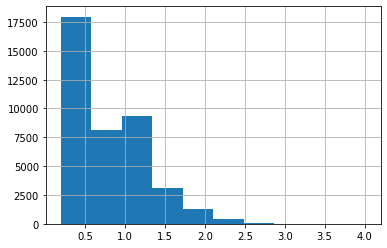

In [4]:
diamonds.carat.hist()

In [5]:
diamonds.describe()

,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.795652,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,0.470806,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,4.010000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


In [6]:
from sklearn import preprocessing as prp

In [7]:
dum_var=['cut','color','clarity']

for var in dum_var:
    names=list(diamonds[var].value_counts().index)
    dum=prp.label_binarize(diamonds[var],names)
    dum=pd.DataFrame(dum)
    dum=dum.rename( columns=dict( zip( range(len(names)) , [ var+'_'+name for name in names ] ) ) )
    dum['indice']=np.array(range(len(dum)))
    dum=dum.set_index('indice')
    diamonds=diamonds.join(dum,on='indice')


In [8]:
diamonds_dum=diamonds.drop(columns=['cut','color','clarity'])

In [13]:
diamonds.columns
diamonds=diamonds.drop(columns=diamonds.columns[10:])

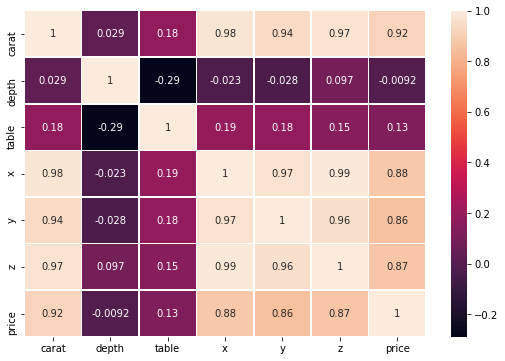

In [15]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(diamonds.corr(), annot=True, linewidths=.5, ax=ax)